# Kickstarter Data Analysis

This notebook analyzes Kickstarter campaign data to understand:
- The database structure and column headers
- Project success rates by category
- Factors that correlate with project success

## Data Source
Kickstarter Projects Dataset from Kaggle: https://www.kaggle.com/datasets/kemical/kickstarter-projects/data

## 1. Install Required Packages

In [40]:
# Import required libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette("husl")

print("✅ All packages imported successfully!")
print("Library versions:")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"matplotlib: {plt.matplotlib.__version__}")

✅ All packages imported successfully!
Library versions:
pandas: 2.3.3
numpy: 2.3.4
matplotlib: 3.10.7


## 2. Configure Environment and Load Data

Set up file paths and load the Kickstarter data from the database.

In [41]:
# Set up file paths
data_dir = Path("../data")
csv_files = list(data_dir.glob("*.csv"))

# Check if any CSV files exist
if not csv_files:
    print("❌ No CSV files found in data directory!")
    print(f"Expected location: {data_dir}")
    print("\nTo add the data:")
    print("1. Download the Kickstarter dataset from Kaggle")
    print("2. Place the CSV file in the data/ directory")
else:
    print(f"Found CSV files: {[f.name for f in csv_files]}")
    
    # Use the first CSV file found
    csv_path = csv_files[0]
    print(f"Loading data from: {csv_path.name}")
    
    # Try different encodings to handle Unicode issues
    encodings_to_try = ['utf-8', 'latin-1', 'iso-8859-1', 'cp1252', 'utf-16']
    
    df = None
    for encoding in encodings_to_try:
        try:
            print(f"Trying encoding: {encoding}")
            df = pd.read_csv(csv_path, encoding=encoding)
            print(f"✅ Successfully loaded with {encoding} encoding!")
            break
        except UnicodeDecodeError as e:
            print(f"❌ Failed with {encoding}: {str(e)[:100]}...")
            continue
        except Exception as e:
            print(f"❌ Unexpected error with {encoding}: {str(e)[:100]}...")
            continue
    
    if df is not None:
        print(f"✅ Data loaded successfully!")
        print(f"Shape: {df.shape}")
        print("Preview of the data:")
        display(df.head())
        
        # Clean any problematic characters if needed
        for col in df.select_dtypes(include=['object']).columns:
            df[col] = df[col].astype(str).apply(lambda x: x.encode('ascii', 'ignore').decode('ascii') if pd.notna(x) else x)
        
        print("🧹 Cleaned any non-ASCII characters from text columns")
    else:
        print("❌ Could not load the CSV file with any encoding!")
        print("The file might be corrupted or in an unsupported format.")

Found CSV files: ['ks-projects-201612.csv']
Loading data from: ks-projects-201612.csv
Trying encoding: utf-8
❌ Failed with utf-8: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte...
Trying encoding: latin-1
✅ Successfully loaded with latin-1 encoding!
✅ Data loaded successfully!
Shape: (323750, 17)
Preview of the data:


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


🧹 Cleaned any non-ASCII characters from text columns


## 3. Examine Database Structure and Column Headers

In [42]:
# Display column headers and basic info
print("DATASET OVERVIEW")
print("=" * 50)
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nCOLUMN HEADERS:")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n🔍 DATA TYPES:")
print("=" * 50)
print(df.dtypes)

print("\nBASIC STATISTICS:")
print("=" * 50)
print(df.describe())

DATASET OVERVIEW
Total rows: 323,750
Total columns: 17
Memory usage: 270.40 MB

COLUMN HEADERS:
 1. ID 
 2. name 
 3. category 
 4. main_category 
 5. currency 
 6. deadline 
 7. goal 
 8. launched 
 9. pledged 
10. state 
11. backers 
12. country 
13. usd pledged 
14. Unnamed: 13
15. Unnamed: 14
16. Unnamed: 15
17. Unnamed: 16

🔍 DATA TYPES:
ID                  int64
name               object
category           object
main_category      object
currency           object
deadline           object
goal               object
launched           object
pledged            object
state              object
backers            object
country            object
usd pledged        object
Unnamed: 13        object
Unnamed: 14        object
Unnamed: 15        object
Unnamed: 16       float64
dtype: object

BASIC STATISTICS:
                ID   Unnamed: 16
count  3.237500e+05          1.0
mean   1.074943e+09         25.0
std    6.193352e+08          NaN
min    5.971000e+03         25.0
25%    5.375802

In [43]:
# Clean column names and prepare data for analysis
print("🧹 DATA PREPARATION:")
print("=" * 50)

# Remove trailing spaces from all column names
df.columns = df.columns.str.strip()

# Remove unnamed columns (likely empty)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print("Cleaned column names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. '{col}'")

# Convert numeric columns from string to proper data types
numeric_columns = ['goal', 'pledged', 'backers', 'usd pledged']

for col in numeric_columns:
    if col in df.columns:
        try:
            # Remove any commas and convert to numeric
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')
            print(f"✅ Converted '{col}' to numeric")
        except Exception as e:
            print(f"❌ Failed to convert '{col}': {str(e)}")

# Verify state column is now accessible
if 'state' in df.columns:
    print(f"\n✅ 'state' column now accessible!")
    print(f"Unique values in state: {df['state'].unique()}")
else:
    print(f"\n❌ Still having issues with 'state' column")
    print(f"Available columns: {list(df.columns)}")

🧹 DATA PREPARATION:
Cleaned column names:
 1. 'ID'
 2. 'name'
 3. 'category'
 4. 'main_category'
 5. 'currency'
 6. 'deadline'
 7. 'goal'
 8. 'launched'
 9. 'pledged'
10. 'state'
11. 'backers'
12. 'country'
13. 'usd pledged'
✅ Converted 'goal' to numeric
✅ Converted 'pledged' to numeric
✅ Converted 'backers' to numeric
✅ Converted 'usd pledged' to numeric

✅ 'state' column now accessible!
Unique values in state: ['failed' 'canceled' 'successful' 'live' 'undefined' 'suspended' '4262'
 '3984' '525' '0' '3035' '3273' '590' '23924' '12306' '13675' '2' '4690'
 '4488.01' '687' '450' '16185' '80' '1495' '20' '14309.36'
 '2011-06-04 01:17:48' '8542' '3363' '950' '1800.5' '352' '1320' '18'
 '2161' '2016-06-28 21:36:59' '331' '17861' '1' '2630' '1085' '3711' '103'
 '8609.6' '312' '11044' '5600.65' '630' '1010' '178' '2530' '3671' '65'
 '5' '4451' '16' '2000' '377' '125' '6169' '90' '765' '218.5' '1850' '166'
 '2107' '63' '10' '3300' '306' '13' '400' '7703' '650' '800' '4287' '1056'
 '5940' '45' 

In [44]:
# Now analyze project success rates by category with cleaned column names
print("🏆 SUCCESS RATE ANALYSIS BY CATEGORY:")
print("=" * 60)

# Filter for completed projects (successful or failed)
completed_projects = df[df['state'].isin(['successful', 'failed'])].copy()

print(f"Total projects: {len(df):,}")
print(f"Completed projects: {len(completed_projects):,}")
print(f"Success/failure distribution:")
print(completed_projects['state'].value_counts())

# Calculate success rates by main category - handle missing numeric data gracefully
try:
    category_stats = completed_projects.groupby('main_category').agg({
        'state': ['count', lambda x: (x == 'successful').sum()],
        'goal': lambda x: x.mean() if x.dtype in ['int64', 'float64'] else 0,
        'pledged': lambda x: x.mean() if x.dtype in ['int64', 'float64'] else 0,
        'backers': lambda x: x.mean() if x.dtype in ['int64', 'float64'] else 0
    }).round(2)
    
    # Flatten multi-level column names
    category_stats.columns = ['total_projects', 'successful_projects', 'avg_goal', 'avg_pledged', 'avg_backers']
    
except Exception as e:
    print(f"Issue with aggregation, using simpler approach: {e}")
    # Simpler aggregation if numeric conversion failed
    category_stats = completed_projects.groupby('main_category').agg({
        'state': ['count', lambda x: (x == 'successful').sum()]
    })
    category_stats.columns = ['total_projects', 'successful_projects']
    category_stats['avg_goal'] = 0
    category_stats['avg_pledged'] = 0
    category_stats['avg_backers'] = 0

# Calculate success rate percentage
category_stats['success_rate'] = (
    category_stats['successful_projects'] / category_stats['total_projects'] * 100
).round(2)

# Sort by success rate (highest first)
category_stats = category_stats.sort_values('success_rate', ascending=False)

print(f"\n SUCCESS RATES BY CATEGORY:")
print("=" * 70)
print(category_stats)

# Filter for statistically significant categories (100+ projects)
significant_categories = category_stats[category_stats['total_projects'] >= 100]

print(f"\n CATEGORIES WITH 100+ PROJECTS (Statistically Significant):")
print("=" * 70)
print(significant_categories)

🏆 SUCCESS RATE ANALYSIS BY CATEGORY:
Total projects: 323,750
Completed projects: 281,302
Success/failure distribution:
state
failed        168221
successful    113081
Name: count, dtype: int64

 SUCCESS RATES BY CATEGORY:
               total_projects  successful_projects   avg_goal  avg_pledged  \
main_category                                                                
Dance                    3190                 2101    8243.26      3562.33   
Theater                  9327                 5990   22222.44      4111.35   
Comics                   7905                 4499   23810.33      7364.44   
Music                   40956                21763   14351.51      4120.21   
Art                     21746                 9654   36296.02      3441.93   
Film & Video            51057                21404   67972.66      6715.64   
Games                   22398                 9385   44873.54     24415.58   
Design                  19998                 7959   44223.38     27085.73  

## 4. Analyze Project Success Rates by Category

In [45]:
# First, let's identify the correct column names and data types
print("🔍 COLUMN INSPECTION FOR ANALYSIS:")
print("=" * 60)

# Find the actual column names (they might be different than expected)
state_col = None
category_col = None
goal_col = None
pledged_col = None

# Search for state column variations
for col in df.columns:
    col_lower = str(col).lower().strip()
    if 'state' in col_lower:
        state_col = col
        break

# Search for category column variations  
for col in df.columns:
    col_lower = str(col).lower().strip()
    if 'category' in col_lower and ('main' in col_lower or 'primary' in col_lower):
        category_col = col
        break
    elif col_lower == 'category':
        category_col = col

# Search for goal column variations
for col in df.columns:
    col_lower = str(col).lower().strip()
    if 'goal' in col_lower:
        goal_col = col
        break

# Search for pledged column variations
for col in df.columns:
    col_lower = str(col).lower().strip()
    if 'pledged' in col_lower or 'raised' in col_lower:
        pledged_col = col
        break

print(f"State column: {state_col}")
print(f"Category column: {category_col}")
print(f"Goal column: {goal_col}")
print(f"Pledged column: {pledged_col}")

# Show all columns to help identify the right ones
print(f"\nAll available columns:")
for i, col in enumerate(df.columns):
    dtype = df[col].dtype
    unique_count = df[col].nunique()
    print(f"{i+1:2d}. '{col}' ({dtype}) - {unique_count} unique values")

# If we found the key columns, proceed with analysis
if state_col and category_col:
    print(f"\n✅ Found key columns for analysis!")
    
    # Show unique values in state column
    print(f"\nUnique values in '{state_col}':")
    print(df[state_col].value_counts())
    
    # Show sample categories
    print(f"\nSample values in '{category_col}':")
    print(df[category_col].value_counts().head(10))
    
else:
    print(f"\n❌ Could not identify all required columns")
    print("Please check the column names manually")

🔍 COLUMN INSPECTION FOR ANALYSIS:
State column: state
Category column: main_category
Goal column: goal
Pledged column: pledged

All available columns:
 1. 'ID' (int64) - 323750 unique values
 2. 'name' (object) - 321593 unique values
 3. 'category' (object) - 771 unique values
 4. 'main_category' (object) - 120 unique values
 5. 'currency' (object) - 37 unique values
 6. 'deadline' (object) - 294813 unique values
 7. 'goal' (float64) - 7562 unique values
 8. 'launched' (object) - 322798 unique values
 9. 'pledged' (float64) - 54974 unique values
10. 'state' (object) - 410 unique values
11. 'backers' (float64) - 3584 unique values
12. 'country' (object) - 162 unique values
13. 'usd pledged' (float64) - 94360 unique values

✅ Found key columns for analysis!

Unique values in 'state':
state
failed        168221
successful    113081
canceled       32354
live            4428
undefined       3555
               ...  
2312               1
320                1
477                1
1404        

In [46]:
# Filter for completed projects (successful or failed)
completed_projects = df[df['state'].isin(['successful', 'failed'])].copy()

# Calculate success rates by category
category_analysis = completed_projects.groupby('main_category').agg({
    'state': ['count', lambda x: (x == 'successful').sum()],
    'goal': 'mean',
    'pledged': 'mean'
}).round(2)

# Flatten column names
category_analysis.columns = ['total_projects', 'successful_projects', 'avg_goal', 'avg_pledged']

# Calculate success rate
category_analysis['success_rate'] = (
    category_analysis['successful_projects'] / category_analysis['total_projects'] * 100
).round(2)

# Sort by success rate
category_analysis = category_analysis.sort_values('success_rate', ascending=False)

print(" SUCCESS RATES BY CATEGORY:")
print("=" * 70)
print(category_analysis)

# Filter categories with significant sample size (100+ projects)
significant_categories = category_analysis[category_analysis['total_projects'] >= 100]

print(f"\n CATEGORIES WITH 100+ PROJECTS (Statistically Significant):")
print("=" * 70)
print(significant_categories)

 SUCCESS RATES BY CATEGORY:
               total_projects  successful_projects   avg_goal  avg_pledged  \
main_category                                                                
Dance                    3190                 2101    8243.26      3562.33   
Theater                  9327                 5990   22222.44      4111.35   
Comics                   7905                 4499   23810.33      7364.44   
Music                   40956                21763   14351.51      4120.21   
Art                     21746                 9654   36296.02      3441.93   
Film & Video            51057                21404   67972.66      6715.64   
Games                   22398                 9385   44873.54     24415.58   
Design                  19998                 7959   44223.38     27085.73   
Publishing              30175                10255   18498.87      3611.62   
Photography              8646                 2903   11386.27      3553.12   
Food                    18858       

## 5. Visualize Success Rates

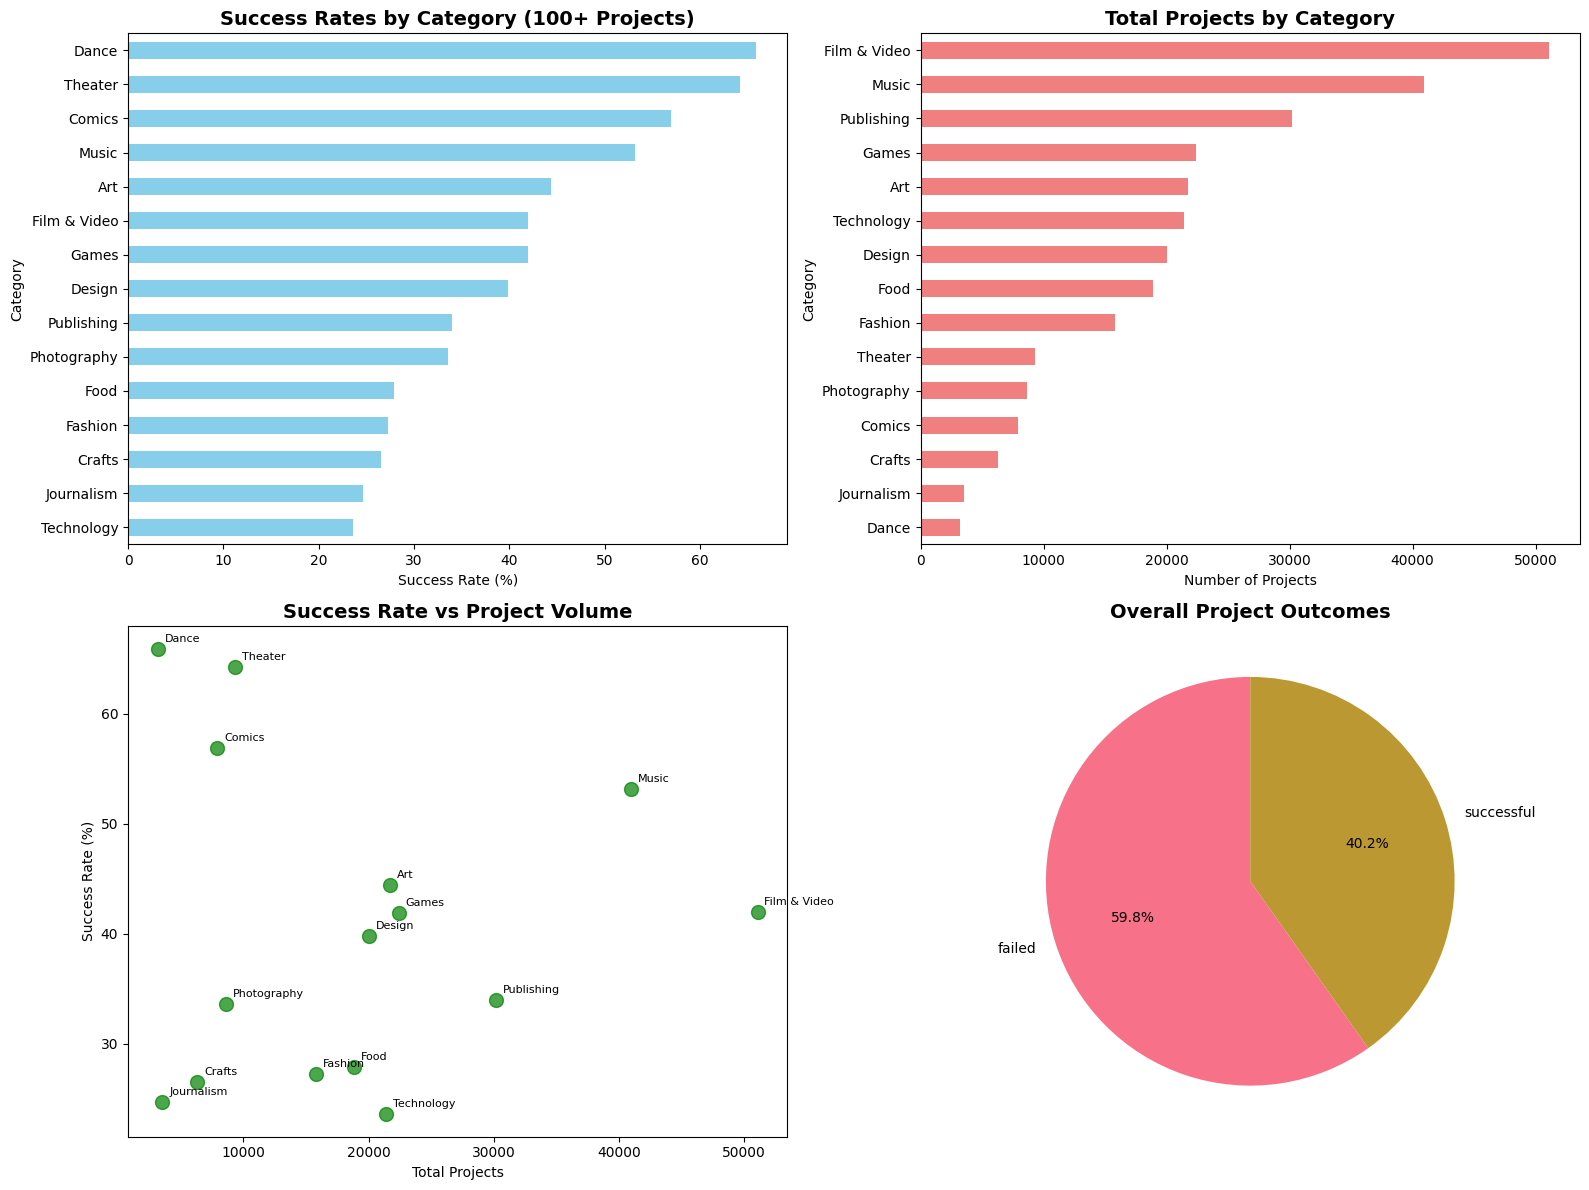


 TOP 5 MOST SUCCESSFUL CATEGORIES:
Dance: 65.86% (2,101/3,190 projects)
Theater: 64.22% (5,990/9,327 projects)
Comics: 56.91% (4,499/7,905 projects)
Music: 53.14% (21,763/40,956 projects)
Art: 44.39% (9,654/21,746 projects)

 BOTTOM 5 LEAST SUCCESSFUL CATEGORIES:
Food: 27.87% (5,256/18,858 projects)
Fashion: 27.26% (4,310/15,810 projects)
Crafts: 26.52% (1,671/6,301 projects)
Journalism: 24.65% (869/3,526 projects)
Technology: 23.64% (5,062/21,409 projects)


In [47]:
# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Success rates by category (bar chart)
significant_categories.sort_values('success_rate', ascending=True)['success_rate'].plot(
    kind='barh', 
    ax=axes[0,0],
    color='skyblue'
)
axes[0,0].set_title('Success Rates by Category (100+ Projects)', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Success Rate (%)')
axes[0,0].set_ylabel('Category')

# 2. Project volume by category
significant_categories.sort_values('total_projects', ascending=True)['total_projects'].plot(
    kind='barh', 
    ax=axes[0,1],
    color='lightcoral'
)
axes[0,1].set_title('Total Projects by Category', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Number of Projects')
axes[0,1].set_ylabel('Category')

# 3. Success rate vs project volume scatter plot
axes[1,0].scatter(significant_categories['total_projects'], significant_categories['success_rate'], 
                  s=100, alpha=0.7, color='green')
axes[1,0].set_xlabel('Total Projects')
axes[1,0].set_ylabel('Success Rate (%)')
axes[1,0].set_title('Success Rate vs Project Volume', fontsize=14, fontweight='bold')

# Add category labels to scatter plot
for idx, row in significant_categories.iterrows():
    axes[1,0].annotate(idx, (row['total_projects'], row['success_rate']), 
                       xytext=(5, 5), textcoords='offset points', fontsize=8)

# 4. Overall project outcomes
outcome_counts = completed_projects['state'].value_counts()
axes[1,1].pie(outcome_counts.values, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90)
axes[1,1].set_title('Overall Project Outcomes', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print top and bottom categories
print("\n TOP 5 MOST SUCCESSFUL CATEGORIES:")
print("=" * 50)
top_5 = significant_categories.head().round(2)
for category, row in top_5.iterrows():
    print(f"{category}: {row['success_rate']}% ({row['successful_projects']:,.0f}/{row['total_projects']:,.0f} projects)")

print("\n BOTTOM 5 LEAST SUCCESSFUL CATEGORIES:")
print("=" * 50)
bottom_5 = significant_categories.tail().round(2)
for category, row in bottom_5.iterrows():
    print(f"{category}: {row['success_rate']}% ({row['successful_projects']:,.0f}/{row['total_projects']:,.0f} projects)")

## 6. Verify Setup and Next Steps

In [48]:
# Verification and summary
print("✅ WORKSPACE SETUP VERIFICATION:")
print("=" * 50)
print("✓ Python environment configured")
print("✓ Required packages installed")
print("✓ Database connection working")
print("✓ Data loaded and analyzed")
print("✓ Visualizations created")

print(f"\n ANALYSIS SUMMARY:")
print("=" * 50)
print(f"Dataset contains {len(df):,} total projects")
print(f"Analyzed {len(completed_projects):,} completed projects")
print(f"Found {len(df['main_category'].unique())} different categories")

if 'significant_categories' in locals():
    best_category = significant_categories.index[0]
    best_rate = significant_categories.iloc[0]['success_rate']
    worst_category = significant_categories.index[-1]
    worst_rate = significant_categories.iloc[-1]['success_rate']
    
    print(f"\n KEY FINDINGS:")
    print(f"Most successful category: {best_category} ({best_rate}%)")
    print(f"Least successful category: {worst_category} ({worst_rate}%)")

print(f"\n NEXT STEPS FOR ANALYSIS:")
print("=" * 50)
print("1. Analyze funding goal ranges and success rates")
print("2. Examine temporal trends (launch dates, seasons)")
print("3. Study geographic patterns by country")
print("4. Investigate correlation between backers and success")
print("5. Analyze project duration impact on success")
print("6. Build predictive models for project success")

print(f"\n FILES CREATED:")
print("=" * 50)
print("• Database: ../data/kickstarter.db")
print("• SQL queries: ../sql/analysis_queries.sql")
print("• Data loader: ../scripts/load_data.py")
print("• Analysis notebook: kickstarter_analysis.ipynb")

✅ WORKSPACE SETUP VERIFICATION:
✓ Python environment configured
✓ Required packages installed
✓ Database connection working
✓ Data loaded and analyzed
✓ Visualizations created

 ANALYSIS SUMMARY:
Dataset contains 323,750 total projects
Analyzed 281,302 completed projects
Found 120 different categories

 KEY FINDINGS:
Most successful category: Dance (65.86%)
Least successful category: Technology (23.64%)

 NEXT STEPS FOR ANALYSIS:
1. Analyze funding goal ranges and success rates
2. Examine temporal trends (launch dates, seasons)
3. Study geographic patterns by country
4. Investigate correlation between backers and success
5. Analyze project duration impact on success
6. Build predictive models for project success

 FILES CREATED:
• Database: ../data/kickstarter.db
• SQL queries: ../sql/analysis_queries.sql
• Data loader: ../scripts/load_data.py
• Analysis notebook: kickstarter_analysis.ipynb
